<a href="https://colab.research.google.com/github/Fameless4ellL/GoogleCollabML/blob/main/Keras_ex(w57673).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#innstall required software
!pip install tensorflow numpy

In [ ]:
#install live loss plot
#it will plot graphs in real time
!pip install livelossplot

In [ ]:
from livelossplot import PlotLossesKeras
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from tensorflow import keras
from matplotlib import pyplot as plt
from random import randint
import time
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.optimizers import SGD

#import necessary keras libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Load TRAIN/TEST DATASET

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


print(train_images.shape) # (60000, 28, 28)
print(train_labels.shape) # (60000,)

(60000, 28, 28)
(60000,)


# Visualise random dataset from TRAIN DATASET

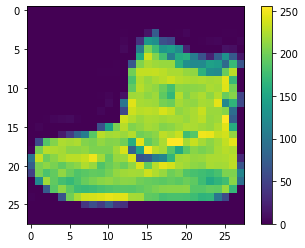

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
import tensorflow as tf 
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

In [ ]:
# Normalize the images. value from -1/2 0 to 1/2
train_images = train_images / 255
test_images = test_images / 255

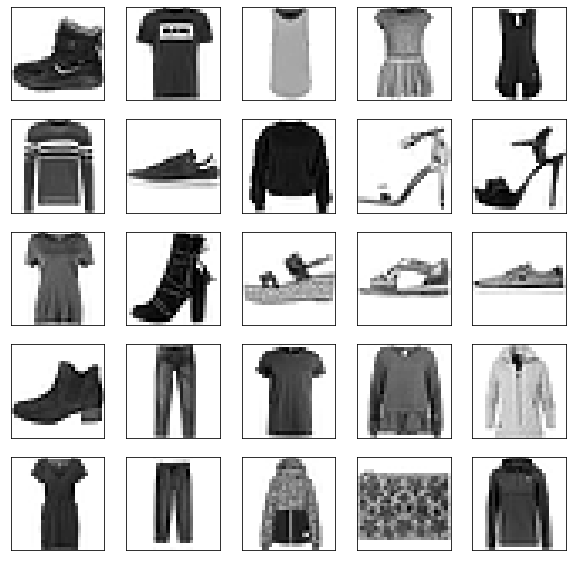

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
	plt.subplot(5,5, i+1)
	plt.xticks([])
	plt.yticks([])
	plt.grid(False)
	plt.imshow(train_images[i], cmap=plt.cm.binary)

In [ ]:


# Flatten the images.
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

print(train_images.shape) # (60000, 784)
print(test_images.shape)  # (10000, 784)

(60000, 784)
(10000, 784)


# Build Model

In [ ]:
model = Sequential([ 
  Dense(64, activation='relu', input_shape=(784,)),
  Dense(64, activation='relu', input_shape=(784,)),
  Dense(10, activation='softmax'),
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


# Compile model

In [ ]:
# Compile the model.
model.compile(optimizer='RMSprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#  Train model

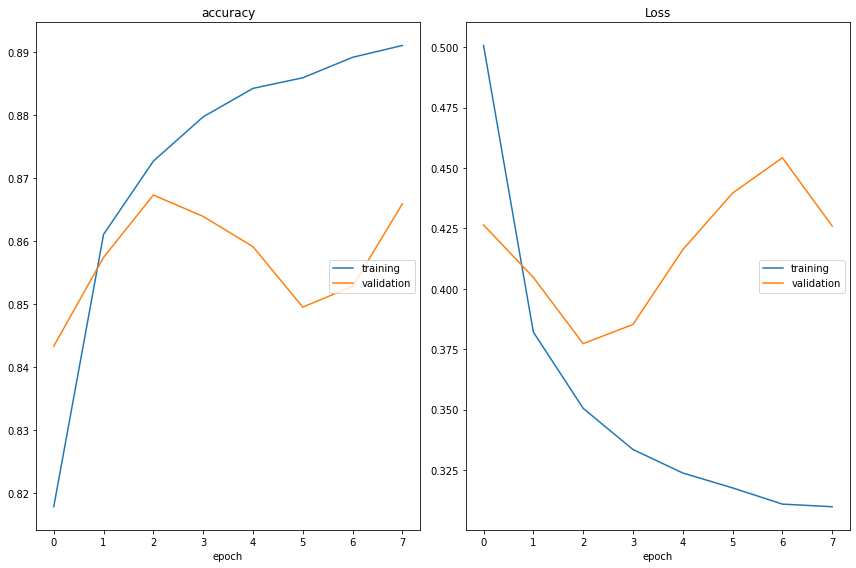

accuracy
	training         	 (min:    0.818, max:    0.891, cur:    0.891)
	validation       	 (min:    0.843, max:    0.867, cur:    0.866)
Loss
	training         	 (min:    0.310, max:    0.501, cur:    0.310)
	validation       	 (min:    0.377, max:    0.454, cur:    0.426)
###
###
###
--- 27 seconds ---


In [ ]:
# TRAINING THE MODEL

# code to use liveplot
plotlosses = PlotLossesKeras()

# we will measure the time required to make training
start_time = time.time()

stop = EarlyStopping(monitor='val_loss', patience=5)

model.fit(train_images, to_categorical(train_labels), epochs=500, 
                    validation_data=(test_images, to_categorical(test_labels)), batch_size=32, callbacks=[stop, plotlosses], verbose=False)


# The training time was:
print("###")
print("###")
print("###")
print("--- %d seconds ---" % (time.time() - start_time))


# Evaluate accuracy 

In [ ]:
#evaluate the accuracy of the model
#the accuracy is ecaulated on the TEST SET, 
#TYPICALY TEST SET IS NOT USED FOR LEARNING
#so the model (neural network sees it for FIRST TIME)
#it is some sort of an exam 
#in this case, the set was used for checking the accuracy  
#during training as a VALIDATION set

model.evaluate(
  test_images,
  to_categorical(test_labels)
)

print("\nRemeber that in this exercise TEST DATASET was used during learning process ")
print("\nFinal accuracy should be evaluated only on virgin data")

313/313 [==============================] - 0s 1ms/step - loss: 0.4260 - accuracy: 0.8659

Remeber that in this exercise TEST DATASET was used during learning process 

Final accuracy should be evaluated only on virgin data
